In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# http://graphics.cs.ucdavis.edu/education/CAGDNotes/Chaikins-Algorithm/Chaikins-Algorithm.html

In [39]:
def emptyImage(SIZE=600):
    img=np.zeros((SIZE,SIZE,3),dtype=np.uint8)
    return img

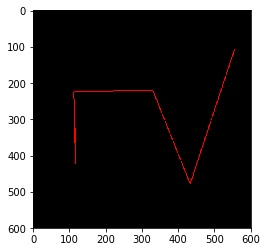

In [59]:
pts=np.array([[117, 424], [112, 225], [329, 220], [432, 478], [554, 109]])
img=emptyImage()
_=cv2.polylines(img,[pts],False,(255,0,0),thickness=2)
plt.imshow(img)

In [67]:
def chaikins(path,ratio=1/4):
    '''
    path:list of point(n+1),(x0,y0)...(xn,yn)
    
    chaikins的做法是每个边 生成2个新点(Ri,Qi)
    分别在ratio,1-ratio,这样n个遍
    处理后就有2N个点，2N-1个遍，把这些新点返回
    '''
    ratio=1-ratio
    V=len(path)
    if isinstance(path,list):
        path=np.array(path)
    assert V>2,'必须是3个点以上才有意义'
    assert path.shape[1]==2,'必须是2维的'
    #R=ratio*startpoint+(1-ratio)*endpoint
    #Q=(1-ratio)*startpoint+ratio*endpoint     
    R=ratio*path[:-1]+(1-ratio)*path[1:]
    Q=(1-ratio)*path[:-1]+ratio*path[1:]
    
    r=np.zeros((2*len(R),2),dtype=np.int32)
    r[0::2]=R
    r[1::2]=Q
    
    assert 2*(V-1)==len(r)
    return r

(-0.5, 599.5, 599.5, -0.5)

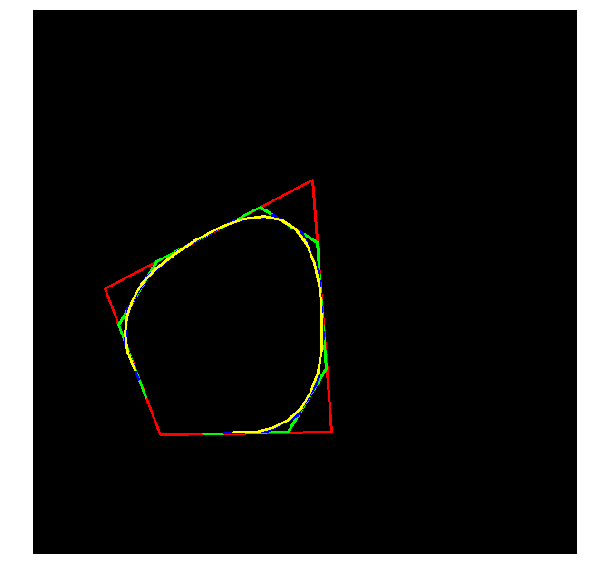

In [74]:
color=[(255,0,0),(0,255,0),(0,0,255),(255,255,0)]
# color=[(255,0,0),(0,255,0)]

# current=pts
current=np.array([[140, 468], [79, 307], [308, 187], [329, 465],[140, 468]])
img=emptyImage()
for i in range(len(color)):
    _=cv2.polylines(img,[current],False,color[i],thickness=2)
    current=chaikins(current)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

In [62]:
pt2

array([[114, 349],
       [113, 299],
       [234, 259],
       [154, 335],
       [193, 222],
       [247, 221],
       [346, 365],
       [226, 270],
       [367, 316],
       [393, 380],
       [480, 221],
       [396, 263],
       [477, 339],
       [507, 247]], dtype=int32)

In [38]:
[1,2]==[1,2]

True